In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
mcdonalds = pd.read_csv("C:/Users/Ehtesham/OneDrive/Desktop/McDonalds Case Study/McDonalds Case Study/mcdonalds.csv")
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head())

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a 

In [6]:
# Convert Yes/No responses into binary format
MD_x = mcdonalds.iloc[:, 0:11].applymap(lambda x: 1 if x == "Yes" else 0)

# Calculate column means
col_means = MD_x.mean()
print(col_means.round(2))


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


Explained Variance Ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


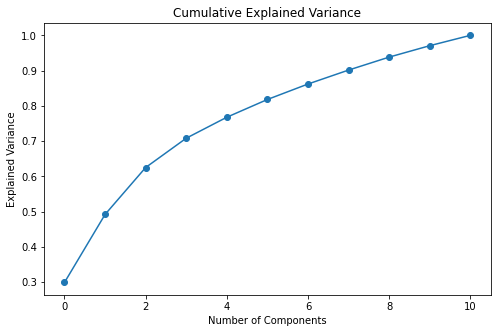

In [7]:
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Visualize explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()


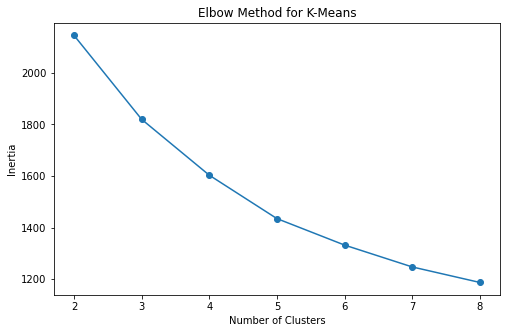

In [10]:
# Run K-Means for 2 to 8 clusters
inertia = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)

# Plot inertia
plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), inertia, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



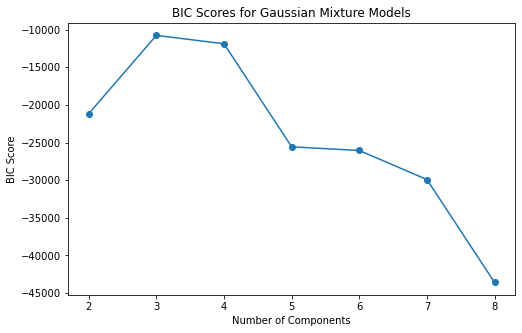

In [11]:
# Fit Gaussian Mixture Models
bic_scores = []
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, random_state=1234)
    gmm.fit(MD_x)
    bic_scores.append(gmm.bic(MD_x))

# Plot BIC scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), bic_scores, marker='o')
plt.title('BIC Scores for Gaussian Mixture Models')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.show()


In [12]:
# Perform clustering with the optimal number of clusters
optimal_k = 4  # Replace with the optimal number from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=1234)
mcdonalds['Cluster'] = kmeans.fit_predict(MD_x)


print(mcdonalds['Cluster'].value_counts())


cluster_profile = mcdonalds.groupby('Cluster')[['Age', 'Gender', 'VisitFrequency', 'Like']].agg(['mean', 'count'])
print(cluster_profile)


0    526
1    373
3    315
2    239
Name: Cluster, dtype: int64
               Age      
              mean count
Cluster                 
0        42.667300   526
1        49.308311   373
2        47.991632   239
3        39.701587   315


C:\Users\Ehtesham\AppData\Local\Temp\ipykernel_15084\431643944.py:10: FutureWarning: ['Gender', 'VisitFrequency', 'Like'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_profile = mcdonalds.groupby('Cluster')[['Age', 'Gender', 'VisitFrequency', 'Like']].agg(['mean', 'count'])
